In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
conda install --yes --prefix /Users/jakevdp/anaconda numpy


EnvironmentLocationNotFound: Not a conda environment: /Users/jakevdp/anaconda


Note: you may need to restart the kernel to use updated packages.


In [21]:
# import data
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [22]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

print(X)
print(X.shape)
print("\n")
print(y)
print(y.shape)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
(10,)


In [23]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
#poly_reg.fit(X_poly, y)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

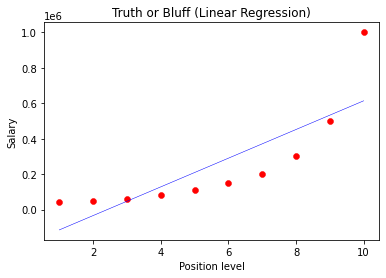

In [25]:
# Visualising the Linear Regression results
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X, lin_reg.predict(X), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

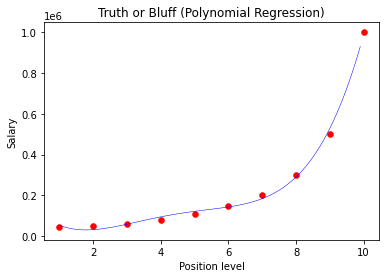

In [26]:
# Visualising the Polynomial Regression results
X_gird = np.arange(min(X), max(X), 0.1)
X_gird = X_gird.reshape((len(X_gird), 1))
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X_gird, lin_reg_2.predict(poly_reg.fit_transform(X_gird)), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

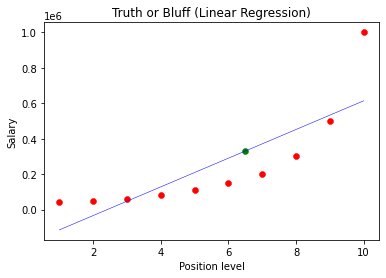

In [27]:
# Predicting a new result with Linear Regression
# print(lin_reg.predict(6.5)[0])
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
level = 6.5
plt.scatter(level, lin_reg.predict([[6.5]]), c = "green", lw = 0.5)
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X, lin_reg.predict(X), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

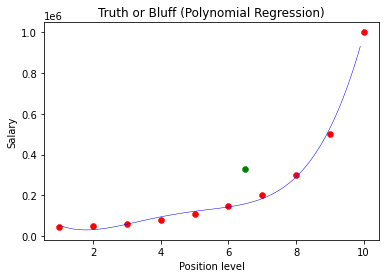

In [28]:
# Predicting a new result with Polynimial Regression
#print(lin_reg_2.predict(poly_reg.fit_transform(6.5))[0])
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
level = 6.5
plt.scatter(level, lin_reg.predict([[6.5]]), c = "green", lw = 0.5)
X_gird = np.arange(min(X), max(X), 0.1)
X_gird = X_gird.reshape((len(X_gird), 1))
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X_gird, lin_reg_2.predict(poly_reg.fit_transform(X_gird)), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")